In [25]:
%matplotlib inline

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import matplotlib.pyplot as plt


import numpy as np
from IPython.display import Image, display

## 1. 自定义 Dataset 类与数据生成

In [26]:
class CustomDataset(Dataset):
    def __init__(self, features, outputs):
        self.features = features
        self.outputs = outputs

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.outputs[idx]


def generate_data(num_samples, noise_std=0.1):
    X = torch.randn(num_samples, 2)
    true_w = torch.tensor([6.0, 3.0]).unsqueeze(1)  
    true_b = 1.0
    y = X.matmul(true_w) + true_b
    noise = noise_std * torch.randn(num_samples, 1)
    y += noise
    return X, y

## 2. 模型定义：线性回归模型

In [27]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        return self.linear(x)

## 3. 模型训练与验证函数

In [28]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    train_losses = []
    val_losses = []
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        
        epoch_train_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_train_loss)
        
        model.eval()
        val_running_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item() * inputs.size(0)
        epoch_val_loss = val_running_loss / len(val_loader.dataset)
        val_losses.append(epoch_val_loss)
        
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.3f}, Val Loss: {epoch_val_loss:.3f}")
    
    return train_losses, val_losses

## 4. 数据准备、训练、绘图与结果输出

In [29]:
torch.manual_seed(721)
num_samples = 1000
noise_std = 0.1
features, outputs = generate_data(num_samples, noise_std)

dataset = CustomDataset(features, outputs)

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

input_dim = 2
output_dim = 1
model = LinearRegressionModel(input_dim, output_dim)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 100
train_losses, val_losses = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs)



Epoch [1/100], Train Loss: 49.518, Val Loss: 46.043
Epoch [2/100], Train Loss: 44.269, Val Loss: 41.180
Epoch [3/100], Train Loss: 39.586, Val Loss: 36.770
Epoch [4/100], Train Loss: 35.345, Val Loss: 32.836
Epoch [5/100], Train Loss: 31.527, Val Loss: 29.348
Epoch [6/100], Train Loss: 28.164, Val Loss: 26.128
Epoch [7/100], Train Loss: 25.065, Val Loss: 23.310
Epoch [8/100], Train Loss: 22.311, Val Loss: 20.766
Epoch [9/100], Train Loss: 19.872, Val Loss: 18.413
Epoch [10/100], Train Loss: 17.669, Val Loss: 16.308
Epoch [11/100], Train Loss: 15.665, Val Loss: 14.466
Epoch [12/100], Train Loss: 13.895, Val Loss: 12.817
Epoch [13/100], Train Loss: 12.302, Val Loss: 11.360
Epoch [14/100], Train Loss: 10.902, Val Loss: 10.005
Epoch [15/100], Train Loss: 9.623, Val Loss: 8.826
Epoch [16/100], Train Loss: 8.481, Val Loss: 7.785
Epoch [17/100], Train Loss: 7.485, Val Loss: 6.817
Epoch [18/100], Train Loss: 6.573, Val Loss: 5.976
Epoch [19/100], Train Loss: 5.771, Val Loss: 5.225
Epoch [20/10

Start drawing...


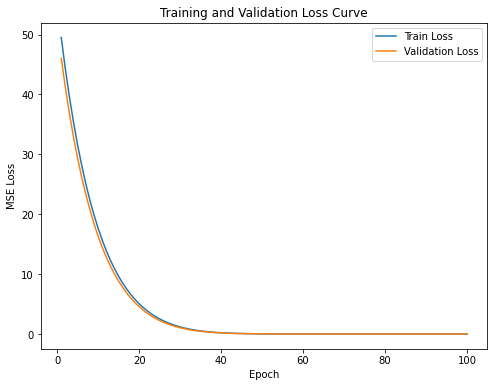

Trained model parameters:
linear.weight: tensor([[5.9992, 2.9968]])
linear.bias: tensor([1.0005])
No overfit or underfit, it's a good convergence curve.


In [30]:
print("Start drawing...")
epochs = np.arange(1, num_epochs + 1)
plt.figure(figsize=(8,6))

plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss Curve')
plt.legend()
plt.show()

plot_filename = "loss_curve.png"
plt.close()

print("Trained model parameters:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data}")
print("No overfit or underfit, it's a good convergence curve.")

# 作业报告

## 1. 数据生成的步骤和参数设置
- **数据生成**：使用 `generate_data` 函数生成数据，公式如下：
  
  $$
  y = 6 \times x_1 + 3 \times x_2 + 1 + \text{noise}
  $$
  
  其中，`noise` 是标准差为 `0.1` 的高斯噪声，用来模拟真实数据的随机性。
- **输入特征**：数据的输入有两个特征（形状为 `(num_samples, 2)`）。
- **样本数量**：一共生成了 1000 个样本。
- **数据集划分**：把数据按 80% 用于训练，20% 用于验证分开。

## 2. 模型结构和超参数设置
- **模型结构**：模型只有一层全连接层（`nn.Linear`），输入维度为 2，输出维度为 1，是最简单的线性回归模型。
- **损失函数**：采用均方误差（`nn.MSELoss`）。
- **优化器**：用 Adam 优化器（`optim.Adam`），学习率设置为 0.01。
- **批量大小**：训练和验证时，每个 batch 大小为 32。
- **训练轮数**：总共训练了 100 轮。

## 3. 损失曲线分析
从图中可以看出，随着训练轮数的增加，训练损失和验证损失都迅速下降，后期趋于稳定且接近于 0。这说明模型学到了数据中的线性关系，而且验证集的损失和训练集差不多，没有明显过拟合。

## 4. 训练结果讨论和结论
1. **收敛速度**：模型在前 20 个 epoch 内迅速收敛，之后损失下降变得比较缓慢。
2. **模型效果**：最终训练和验证loss都非常低，说明模型很好的拟合了数据。
3. **过拟合情况**：训练集和验证集的损失曲线基本一致，模型没有出现明显的过拟合或欠拟合问题。
4. **总结**：对于这样一个简单的线性回归问题，模型表现很好，准确捕捉到了数据中的线性关系，也验证了 PyTorch 实现线性回归的正确性。
